# Scientific Computing Report

This report will outline the code produced for this module as a library able to compute limit cycles of ODE's and PDE's as well as confirming the steady-states of diffusive PDE's

# A brief summary of your software (30% of the marks)

Structure of the modules,
How inputs are taken,
Checks,
Outputs

Start with the ODE solvers:

1. Present the difference between the solvers for solving a few steps of ODE of n dim
2. Isolate a periodic solution using shooting and know parameters
3. Trace out the parameter-period curve using both natural and pseudo-arclength continuation methods.


In [1]:
# imports 
import numpy as np
import matplotlib.pyplot as plt
from test_equations import *
from helpers import *

## ODE solvers

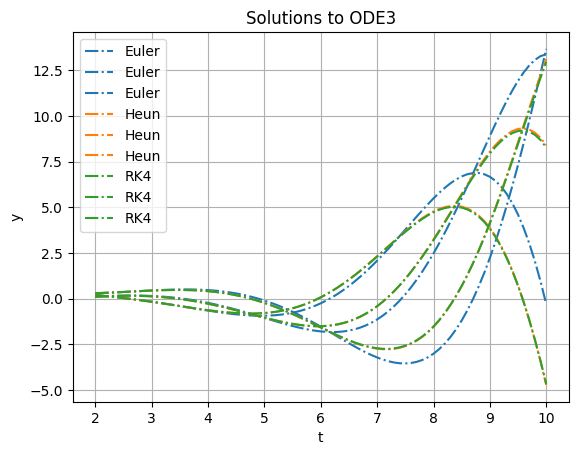

In [2]:
from solve_to import solve_to

# define the initial conditions
y0, t0, t1, delta_t = [0.3, 0.1, 0.2], 2, 10, 0.1

# solve the ODE
for i, method in enumerate(['Euler', 'Heun', 'RK4']):
    Y, t = solve_to(ode3, y0, t0, t1, delta_t, method)
    # plot the solution
    plt.plot(t, Y, label=method, color='C'+str(i), linestyle='-.')

plot_help(plt, 't', 'y', 'Solutions to ODE3', legend=True)

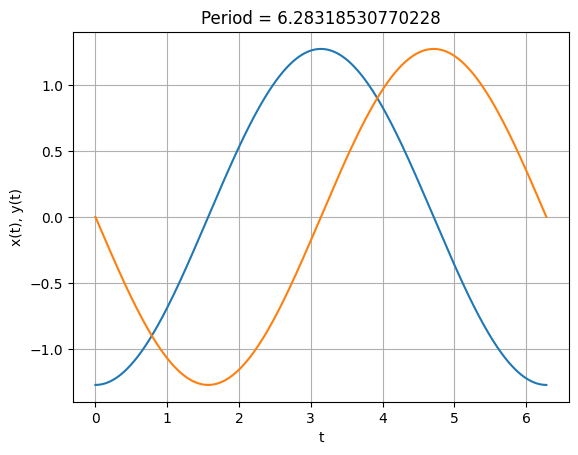

In [3]:
from shooting import Discretisation, shooting_solve

discret = Discretisation()

# initial guess
Y0, T, b = [0.1,0.1], 10, 1
u0 = np.append(Y0, T)

# solve the ode using the shooting method
fun = discret.shooting_setup(hopf, Y0, T=T, args=b)
Y0, T0 = shooting_solve(fun, u0)

# solve for one period of the solution
Y,t = solve_to(hopf, Y0, 0, T0, args=b)
plt.plot(t, Y)
plot_help(plt, 't', 'x(t), y(t)', 'Period = ' + str(T0))

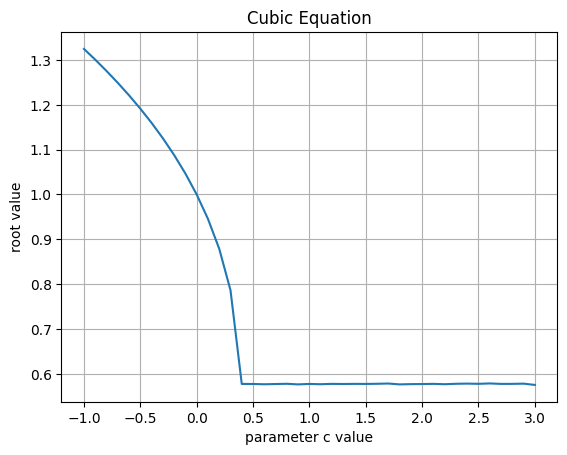

In [4]:
from continuation import Continuation
import scipy.optimize

# create continuation class
cont = Continuation(solver=scipy.optimize.root)
# create discretisation class
discret = Discretisation()
# initial guess
x0 , p0 = 1, -1
# solve for the root of the cubic equation using no discretisation
X, C = cont.nat_continuation(cubic, x0, p0, step=0.1, max_steps=40, discret=None)
# plot the solution
plt.figure()
plt.plot(C, X)
plot_help(plt, 'parameter c value', 'root value', 'Cubic Equation')




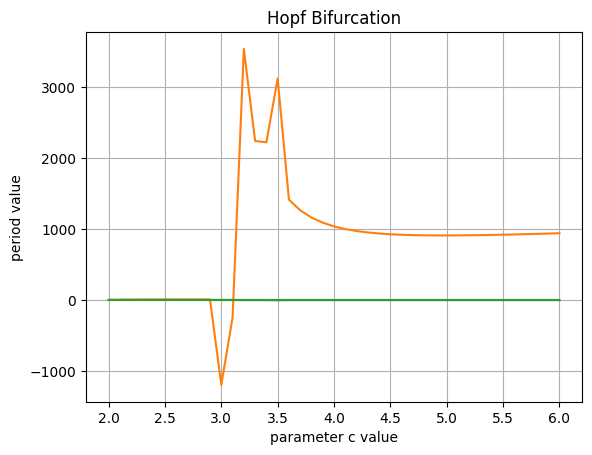

In [21]:
# now need to test natural continuation with a differential equation - Hopf bifurcation and shooting discretisation
discret = Discretisation().shooting_setup

# initial guess
x0 , p0 = [1, 10,2], [2, 1]

# solve for the root of the hopf equation using shooting discretisation
X, C = cont.nat_continuation(hopf_polar, x0, p0, step=0.1, max_steps=40, discret=discret)

# plot the solution
plt.figure()
plt.plot(C, X)
plot_help(plt, 'parameter c value', 'period value', 'Hopf Bifurcation')


## PDE solvers 

Solver profiling and showing modularity
1. Explicit methods
2. implicit methods

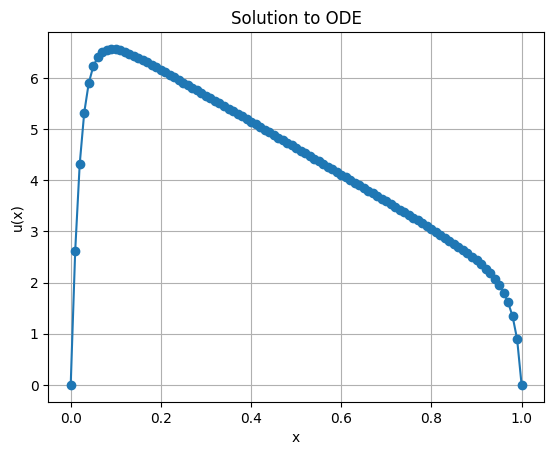

In [30]:
# define the ODE to solve
m, c, k,  bound_type, alpha, beta, a, b, args = 1, 1, 1, 'DD', 0, 0, 0, 1, (1,)
q = lambda x, u, *args: np.exp(-args[0] * x * u**2) # lambda function for q(x, u, args)

# create the ODE object
from bvp_solver import ODE
ODE = ODE(m, c, k, q, bound_type, alpha, beta, a, b, *args)

# create the solver object
from bvp_solver import Solver
N , method = 100, 'scipy'
solver = Solver(ODE, N, method)

# solve the ODE
u = solver.solve()
x = solver.x

# plot the solution
plt.plot(x, u, 'o-')
plot_help(plt, 'x', 'u(x)', 'Solution to ODE')



# A description of the key software design decisions made (40% of the marks)

A run through of the code

# A reflective learning log (30% of the marks)